In [1]:
import pandas as pd

prevdata_df=pd.read_csv(r"previous_application.csv")

In [2]:
prevdata_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
prevdata_df.shape

(1670214, 37)

In [4]:
nullcheck=round(100*prevdata_df.isnull().sum()/len(prevdata_df),2)

In [5]:
nullcheck.sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
DAYS_TERMINATION               40.30
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
AMT_GOODS_PRICE                23.08
CNT_PAYMENT                    22.29
AMT_ANNUITY                    22.29
PRODUCT_COMBINATION             0.02
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_CREDIT                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
AMT_APPLICATION                 0.00
NAME_PAYMENT_TYPE               0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
C

In [6]:
t1=nullcheck[nullcheck>50.00]

In [7]:
#Checking the values in descending order.
t1.sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED    99.64
RATE_INTEREST_PRIMARY       99.64
RATE_DOWN_PAYMENT           53.64
AMT_DOWN_PAYMENT            53.64
dtype: float64

In [8]:
#Capturing the names of the columns with more than 50 % null values.
t1.index

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')

In [9]:
#Dropping columns with more than 50 % null values.
prevdata_df.drop(t1.index,axis=1,inplace=True)

In [10]:
#Checking the null values in AMT_ANNUITY
prevdata_df["AMT_ANNUITY"].value_counts(dropna=False)

NaN           372235
 2250.000      31865
 11250.000     13974
 6750.000      13442
 9000.000      12496
 22500.000     11903
 4500.000      10597
 13500.000      7171
 3375.000       4806
 7875.000       4674
 38250.000      4129
 5625.000       3993
 45000.000      3604
 10125.000      2558
 16875.000      2436
 18000.000      1861
 29250.000      1662
 0.000          1637
 12375.000      1634
 20250.000      1621
 33750.000      1412
 15750.000      1370
 27000.000      1075
 14625.000       864
 10492.020       841
 36000.000       816
 27449.820       731
 21709.125       728
 5246.010        665
 7869.015        653
               ...  
 7856.415          1
 2297.430          1
 27496.305         1
 14802.165         1
 10128.735         1
 12364.425         1
 27528.570         1
 36668.745         1
 6084.675          1
 36801.630         1
 12348.450         1
 12351.825         1
 18615.735         1
 19864.665         1
 22025.835         1
 9826.515          1
 12909.240   

In [11]:
prevdata_df["AMT_ANNUITY"].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

## We can impute the NAN Values with median

In [12]:
#Checking the null values in CNT_PAYMENT
prevdata_df["CNT_PAYMENT"].value_counts(dropna=False)

NaN      372230
 12.0    323049
 6.0     190461
 0.0     144985
 10.0    141851
 24.0    137764
 18.0     77430
 36.0     72583
 60.0     53600
 48.0     47316
 8.0      30349
 4.0      26924
 30.0     16924
 14.0      8253
 42.0      7136
 16.0      5710
 5.0       3957
 54.0      2104
 20.0      1805
 7.0       1434
 9.0       1236
 3.0       1100
 15.0       904
 11.0       669
 72.0       139
 13.0        51
 17.0        48
 84.0        45
 22.0        37
 23.0        27
 26.0        13
 35.0        11
 66.0        10
 29.0         8
 28.0         8
 32.0         6
 19.0         6
 34.0         4
 59.0         4
 45.0         3
 41.0         3
 47.0         3
 21.0         3
 44.0         2
 39.0         2
 38.0         2
 46.0         2
 40.0         1
 33.0         1
 53.0         1
Name: CNT_PAYMENT, dtype: int64

## we can impute NAN Values with 12 as 12 is the number with highest number of record 

In [13]:
#Checking the null values in AMT_GOODS_PRICE
prevdata_df["AMT_GOODS_PRICE"].value_counts(dropna=False)

NaN             385515
 45000.000       47831
 225000.000      43549
 135000.000      40666
 450000.000      38926
 90000.000       29367
 180000.000      24736
 270000.000      20567
 675000.000      20235
 67500.000       16857
 900000.000      15572
 112500.000      14373
 315000.000      11920
 229500.000      10756
 337500.000      10537
 360000.000      10286
 157500.000      10220
 1350000.000      8434
 202500.000       7937
 247500.000       7161
 454500.000       7039
 1129500.000      6928
 0.000            6869
 540000.000       6842
 1125000.000      6390
 405000.000       5872
 765000.000       5124
 585000.000       4770
 292500.000       3787
 495000.000       3749
                 ...  
 138388.725          1
 139113.900          1
 355140.000          1
 113386.680          1
 88903.980           1
 45118.350           1
 355729.500          1
 79112.250           1
 355873.500          1
 127304.775          1
 355855.500          1
 61114.140           1
 37941.705 

## we can impute NAN Values with the avg of AMT_GOODS_PRICE

In [14]:
#Checking the null values in NFLAG_INSURED_ON_APPROVAL
prevdata_df["NFLAG_INSURED_ON_APPROVAL"].value_counts(dropna=False)

NaN     673065
 0.0    665527
 1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

## we can impute NAN Values with 0 as 0 is having the highest number of record

In [15]:
#Checking the null values in DAYS_TERMINATION
prevdata_df["DAYS_TERMINATION"].value_counts(dropna=False)


NaN          673065
 365243.0    225913
-233.0          786
-170.0          770
-184.0          770
-163.0          769
-169.0          760
-303.0          754
-177.0          753
-305.0          742
-212.0          741
-156.0          740
-142.0          738
-149.0          736
-339.0          729
-304.0          727
-261.0          727
-162.0          727
-218.0          726
-190.0          726
-239.0          726
-247.0          724
-240.0          723
-198.0          723
-246.0          722
-164.0          722
-331.0          721
-171.0          721
-155.0          720
-225.0          720
              ...  
-2830.0           2
-2818.0           2
-2813.0           2
-2812.0           2
-2811.0           2
-2737.0           2
-2786.0           2
-2833.0           2
-2794.0           2
-2797.0           1
-2795.0           1
-2837.0           1
-2852.0           1
-2779.0           1
-2847.0           1
-2832.0           1
-2826.0           1
-2848.0           1
-2865.0           1


## We can impute NAN Values with 0 as person may not have previous application

In [16]:
#Checking the data types
prevdata_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP         

In [17]:
#Capturing the remaining categorical column names
temp_list=prevdata_df.select_dtypes(include=["object"]).columns

In [18]:
#Correcting the data type of the below columns as they are categorical variables
prevdata_df.loc[:,temp_list]=prevdata_df.loc[:,temp_list].astype("category")

In [19]:
#Checking the data types after correction.
prevdata_df.dtypes

SK_ID_PREV                        int64
SK_ID_CURR                        int64
NAME_CONTRACT_TYPE             category
AMT_ANNUITY                     float64
AMT_APPLICATION                 float64
AMT_CREDIT                      float64
AMT_GOODS_PRICE                 float64
WEEKDAY_APPR_PROCESS_START     category
HOUR_APPR_PROCESS_START           int64
FLAG_LAST_APPL_PER_CONTRACT    category
NFLAG_LAST_APPL_IN_DAY            int64
NAME_CASH_LOAN_PURPOSE         category
NAME_CONTRACT_STATUS           category
DAYS_DECISION                     int64
NAME_PAYMENT_TYPE              category
CODE_REJECT_REASON             category
NAME_TYPE_SUITE                category
NAME_CLIENT_TYPE               category
NAME_GOODS_CATEGORY            category
NAME_PORTFOLIO                 category
NAME_PRODUCT_TYPE              category
CHANNEL_TYPE                   category
SELLERPLACE_AREA                  int64
NAME_SELLER_INDUSTRY           category
CNT_PAYMENT                     float64


In [20]:
prevdata_df.loc[:,["SK_ID_PREV","SK_ID_CURR","SELLERPLACE_AREA","NFLAG_INSURED_ON_APPROVAL","NFLAG_LAST_APPL_IN_DAY","HOUR_APPR_PROCESS_START"]]=prevdata_df.loc[:,["SK_ID_PREV","SK_ID_CURR","SELLERPLACE_AREA","NFLAG_INSURED_ON_APPROVAL","NFLAG_LAST_APPL_IN_DAY","HOUR_APPR_PROCESS_START"]].astype('category')

In [21]:
prevdata_df.dtypes

SK_ID_PREV                     category
SK_ID_CURR                     category
NAME_CONTRACT_TYPE             category
AMT_ANNUITY                     float64
AMT_APPLICATION                 float64
AMT_CREDIT                      float64
AMT_GOODS_PRICE                 float64
WEEKDAY_APPR_PROCESS_START     category
HOUR_APPR_PROCESS_START        category
FLAG_LAST_APPL_PER_CONTRACT    category
NFLAG_LAST_APPL_IN_DAY         category
NAME_CASH_LOAN_PURPOSE         category
NAME_CONTRACT_STATUS           category
DAYS_DECISION                     int64
NAME_PAYMENT_TYPE              category
CODE_REJECT_REASON             category
NAME_TYPE_SUITE                category
NAME_CLIENT_TYPE               category
NAME_GOODS_CATEGORY            category
NAME_PORTFOLIO                 category
NAME_PRODUCT_TYPE              category
CHANNEL_TYPE                   category
SELLERPLACE_AREA               category
NAME_SELLER_INDUSTRY           category
CNT_PAYMENT                     float64


In [22]:
#Filtering the quantitative columns in to new df
ndquant_df=prevdata_df.select_dtypes(include=["int64","float64"])

In [23]:
ndquant_df

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,1730.430,17145.0,17145.0,17145.0,-73,12.0,365243.0,-42.0,300.0,-42.0,-37.0
1,25188.615,607500.0,679671.0,607500.0,-164,36.0,365243.0,-134.0,916.0,365243.0,365243.0
2,15060.735,112500.0,136444.5,112500.0,-301,12.0,365243.0,-271.0,59.0,365243.0,365243.0
3,47041.335,450000.0,470790.0,450000.0,-512,12.0,365243.0,-482.0,-152.0,-182.0,-177.0
4,31924.395,337500.0,404055.0,337500.0,-781,24.0,NaN,NaN,NaN,NaN,NaN
5,23703.930,315000.0,340573.5,315000.0,-684,18.0,365243.0,-654.0,-144.0,-144.0,-137.0
6,NaN,0.0,0.0,NaN,-14,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,0.0,0.0,NaN,-21,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.0,0.0,NaN,-386,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,0.0,0.0,NaN,-57,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Checking the outliers for AMT_CREDIT
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.hist(ndquant_df["AMT_CREDIT"])
plt.yscale("log")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 1000x1000 with 1 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


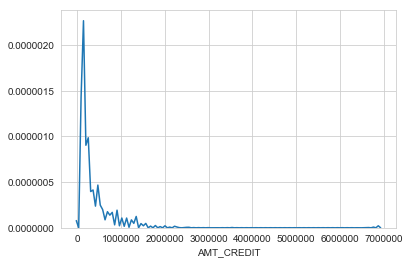

In [25]:
import seaborn as sns
sns.set_style("whitegrid")
sns.distplot(ndquant_df["AMT_CREDIT"],hist=False)
plt.show()

In [26]:
ndquant_df["AMT_CREDIT"].describe(percentiles=[0.25,0.5,0.75,0.95])

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
95%      8.865000e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

## We can clearly see that 95 % of the values are less than 8.86e5= 886000. We can remove income greater than 886000 from this column.

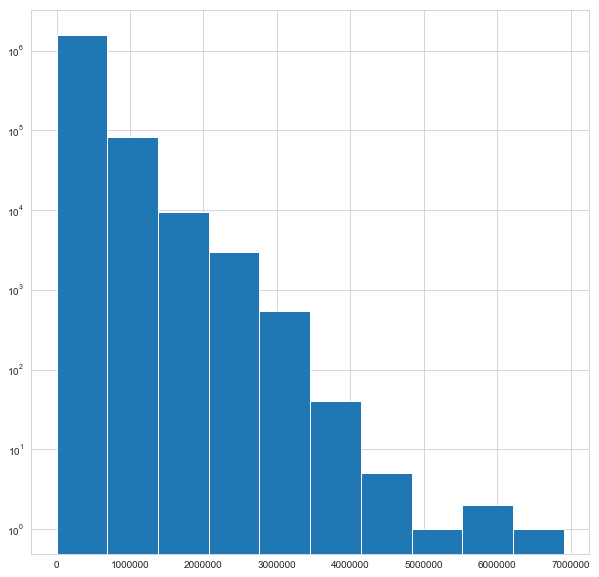

In [27]:
#Checking the outliers for AMT_APPLICATION
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.hist(ndquant_df["AMT_APPLICATION"])
plt.yscale("log")
plt.show()

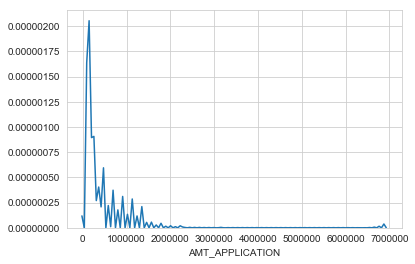

In [28]:
import seaborn as sns
sns.set_style("whitegrid")
sns.distplot(ndquant_df["AMT_APPLICATION"],hist=False)
plt.show()

In [29]:
ndquant_df["AMT_APPLICATION"].describe(percentiles=[0.25,0.5,0.75,0.95])

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
95%      7.875000e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

## We can clearly see that 95 % of the values are less than 7.87e5= 787000. We can remove amt_application greater than 787000 from this column.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


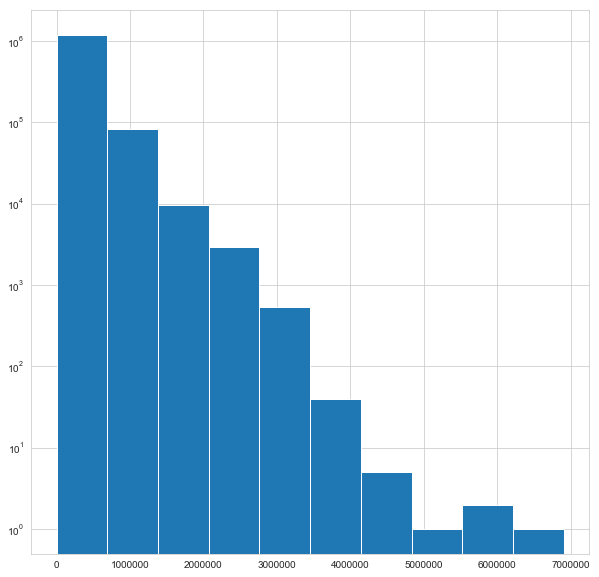

In [30]:
#Checking the outliers for AMT_GOODS_PRICE
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.hist(ndquant_df["AMT_GOODS_PRICE"])
plt.yscale("log")
plt.show()

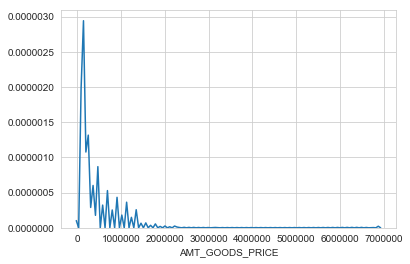

In [31]:
import seaborn as sns
sns.set_style("whitegrid")
sns.distplot(ndquant_df["AMT_GOODS_PRICE"],hist=False)
plt.show()

In [32]:
ndquant_df["AMT_GOODS_PRICE"].describe(percentiles=[0.25,0.5,0.75,0.95])

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
95%      9.000000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

## We can clearly see that 95 % of the values are less than 9.00e5= 900000. We can remove amt_goods_price greater than 900000 from this column.

In [33]:
#Treating the outliers in AMT_CREDIT column
ndquant_df=ndquant_df[ndquant_df["AMT_CREDIT"]<886000] 

In [34]:
#Treating the outliers in AMT_APPLICATION column
ndquant_df=ndquant_df[ndquant_df["AMT_APPLICATION"]<787000] 

In [35]:
#Treating the outliers in AMT_GOODS_PRICE column
ndquant_df=ndquant_df[ndquant_df["AMT_GOODS_PRICE"]<900000] 

In [36]:
ndquant_df["AMT_GOODS_PRICE"].describe(percentiles=[0.25,0.5,0.75,0.95])

count    1.198222e+06
mean     1.589354e+05
std      1.594356e+05
min      0.000000e+00
25%      4.728116e+04
50%      9.900000e+04
75%      2.114423e+05
95%      5.006183e+05
max      7.867800e+05
Name: AMT_GOODS_PRICE, dtype: float64

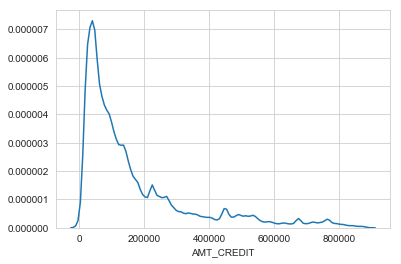

In [37]:
import seaborn as sns
sns.set_style("whitegrid")
sns.distplot(ndquant_df["AMT_CREDIT"],hist=False)
plt.show()

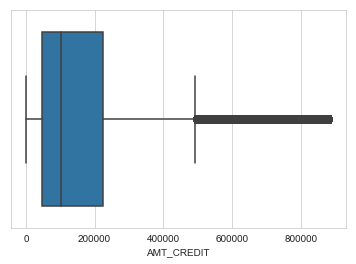

In [38]:
sns.boxplot(ndquant_df["AMT_CREDIT"])
plt.show()

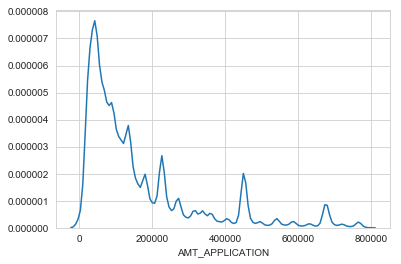

In [39]:
import seaborn as sns
sns.set_style("whitegrid")
sns.distplot(ndquant_df["AMT_APPLICATION"],hist=False)
plt.show()

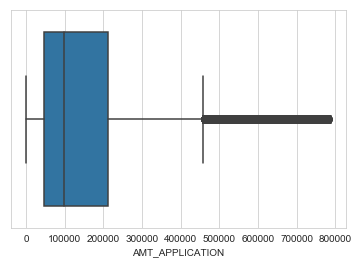

In [40]:
sns.boxplot(ndquant_df["AMT_APPLICATION"])
plt.show()

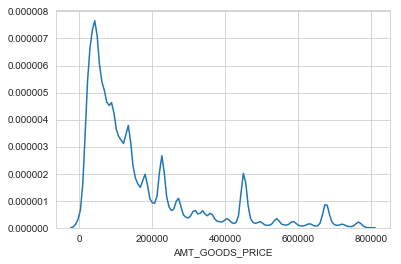

In [41]:
import seaborn as sns
sns.set_style("whitegrid")
sns.distplot(ndquant_df["AMT_GOODS_PRICE"],hist=False)
plt.show()

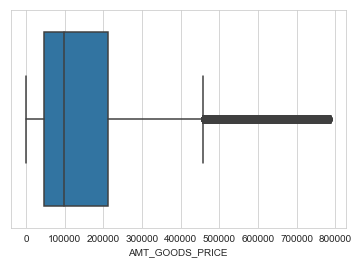

In [42]:
sns.boxplot(ndquant_df["AMT_GOODS_PRICE"])
plt.show()

### STD DEV has reduced.
### Mean has reduced.
### Mean is now representative of the population 

In [43]:
#Binning the AMT_AMOUNT_APPLICATION
prevdata_df["Amount_Application_Category"]=pd.qcut(prevdata_df["AMT_APPLICATION"],[0,0.5,0.75,1],labels=["Low", "Med", "High"])

In [44]:
prevdata_df["Amount_Application_Category"]

0           Low
1          High
2           Med
3          High
4          High
5          High
6           Low
7           Low
8           Low
9           Low
10         High
11         High
12          Med
13          Low
14          Low
15          Med
16          Low
17          Med
18          Med
19          Low
20         High
21         High
22          Low
23         High
24          Low
25         High
26         High
27         High
28          Med
29          Low
           ... 
1670184    High
1670185    High
1670186     Low
1670187     Low
1670188    High
1670189    High
1670190     Low
1670191     Low
1670192     Low
1670193     Low
1670194     Med
1670195    High
1670196     Low
1670197     Med
1670198     Low
1670199     Low
1670200     Med
1670201     Low
1670202     Low
1670203     Low
1670204    High
1670205     Med
1670206     Med
1670207     Med
1670208    High
1670209    High
1670210     Med
1670211     Med
1670212     Med
1670213    High
Name: Amount_Application

In [45]:
#Binning the AMT_CREDIT
prevdata_df["Amount_Credit_Category"]=pd.qcut(prevdata_df["AMT_CREDIT"],[0,0.5,0.75,1],labels=["Low", "Med", "High"])

In [46]:
prevdata_df["Amount_Credit_Category"]

0           Low
1          High
2           Med
3          High
4          High
5          High
6           Low
7           Low
8           Low
9           Low
10         High
11         High
12          Med
13          Low
14          Low
15          Med
16          Low
17          Med
18          Med
19          Low
20         High
21         High
22          Low
23         High
24          Low
25         High
26         High
27         High
28          Low
29          Low
           ... 
1670184    High
1670185    High
1670186     Low
1670187     Low
1670188    High
1670189    High
1670190     Low
1670191     Low
1670192     Low
1670193     Low
1670194     Med
1670195    High
1670196     Low
1670197     Med
1670198     Low
1670199     Low
1670200     Med
1670201     Low
1670202     Low
1670203     Low
1670204    High
1670205     Med
1670206    High
1670207     Med
1670208    High
1670209    High
1670210     Low
1670211     Med
1670212     Med
1670213    High
Name: Amount_Credit_Cate

In [47]:
ndquant_df.describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,1.159888e+06,1.198222e+06,1.198222e+06,1.198222e+06,1.198222e+06,1.159892e+06,916964.000000,916964.000000,916964.000000,916964.000000,916964.000000
mean,1.351605e+04,1.589136e+05,1.693604e+05,1.589354e+05,-1.057670e+03,1.471224e+01,353516.504830,10851.467983,19334.982083,67560.760720,68926.168770
std,1.072386e+04,1.594041e+05,1.768855e+05,1.594356e+05,7.917355e+02,1.208516e+01,64420.807529,65110.369411,83310.902976,142876.291579,143950.994151
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,0.000000e+00,-2854.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000
25%,6.018030e+03,4.727250e+04,4.757400e+04,4.728116e+04,-1.601000e+03,6.000000e+00,365243.000000,-1650.000000,-1342.000000,-1378.000000,-1361.000000
50%,1.054440e+04,9.900000e+04,1.018800e+05,9.900000e+04,-8.130000e+02,1.200000e+01,365243.000000,-851.000000,-458.000000,-590.000000,-578.000000
75%,1.769580e+04,2.113864e+05,2.250000e+05,2.114423e+05,-4.060000e+02,1.800000e+01,365243.000000,-416.000000,27.000000,-119.000000,-110.000000
max,2.013714e+05,7.867800e+05,8.858332e+05,7.867800e+05,-1.000000e+00,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


# **Inferences from Univariate Analysis of numerical variables.**

- As we can see form amt_credit and amt_goods_price people go for the slightly higher amount than their requirement.
- From amt_annuity we can inference that people try to keep thier annuity low.
- As we can see from AMT_APPLICATION and AMT_CREDIT applicant has been provided with more fund than requested 

<Figure size 2160x2160 with 0 Axes>

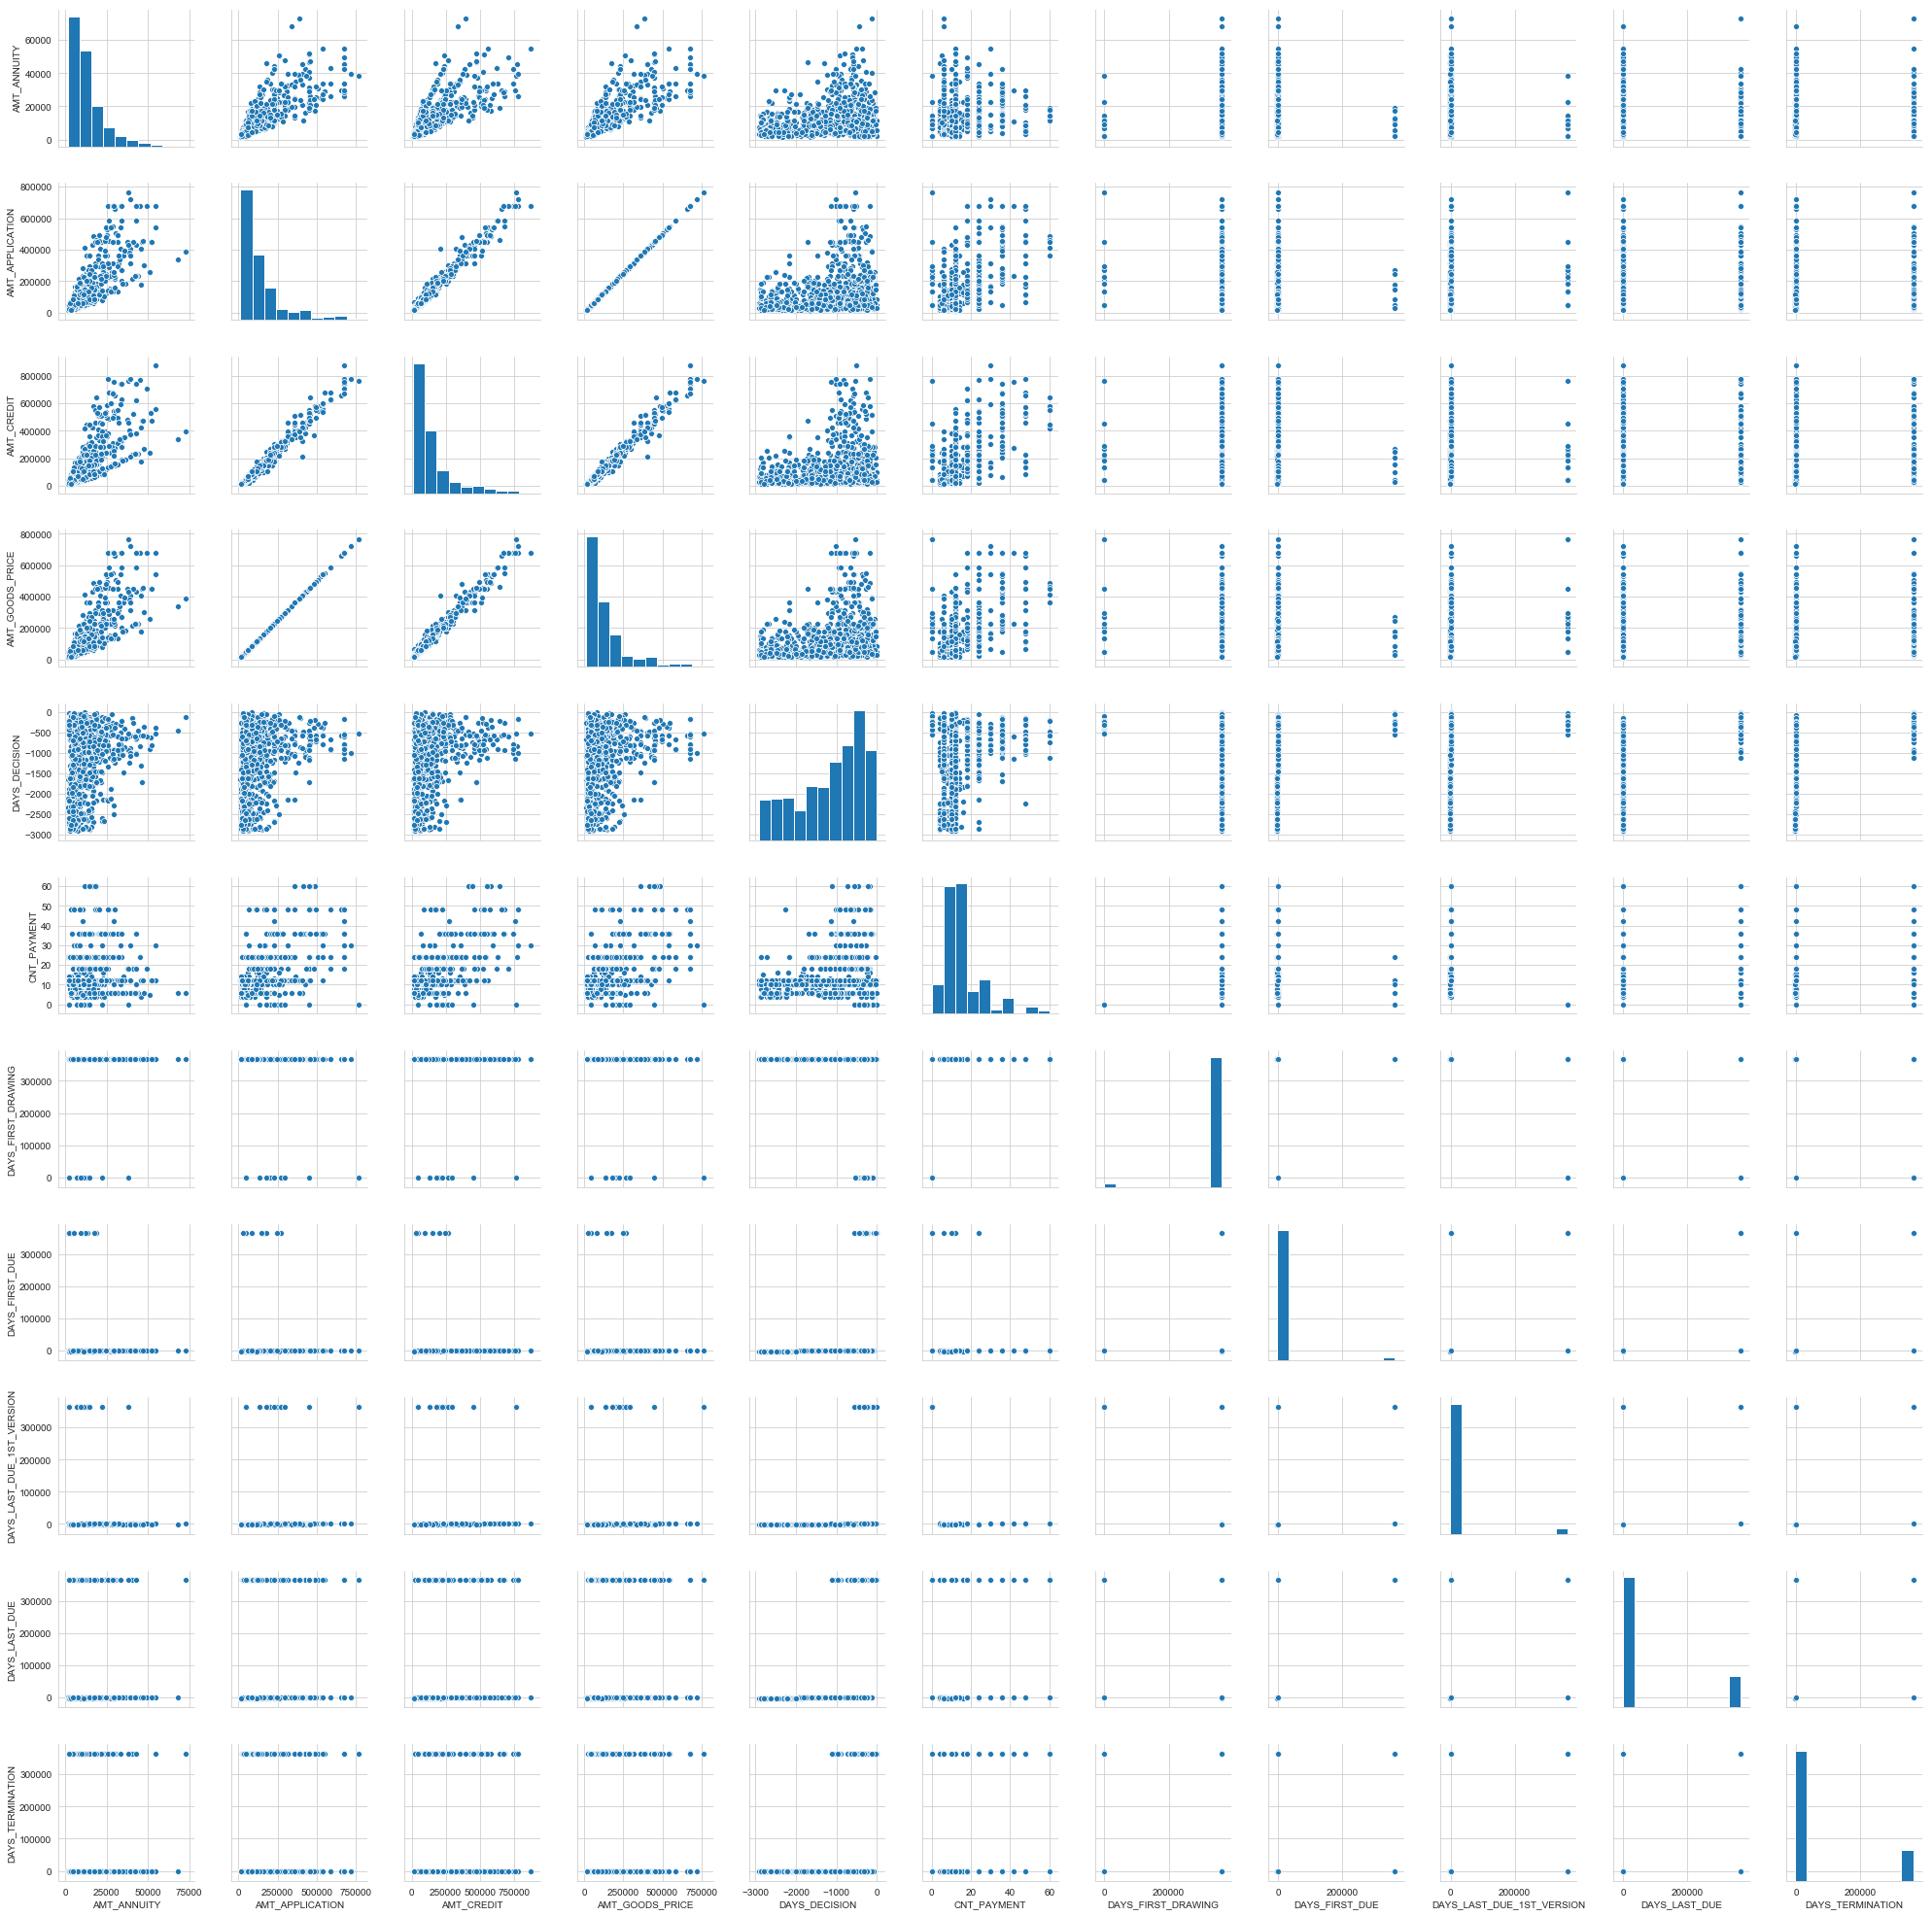

In [48]:
# Performing Bivariate Analysis for numerical columns.

import seaborn as sns
plt.figure(figsize=(30,30))
sns.pairplot(ndquant_df.sample(1000).dropna())
plt.show()

In [49]:
ndquant_df_corr=ndquant_df.corr()

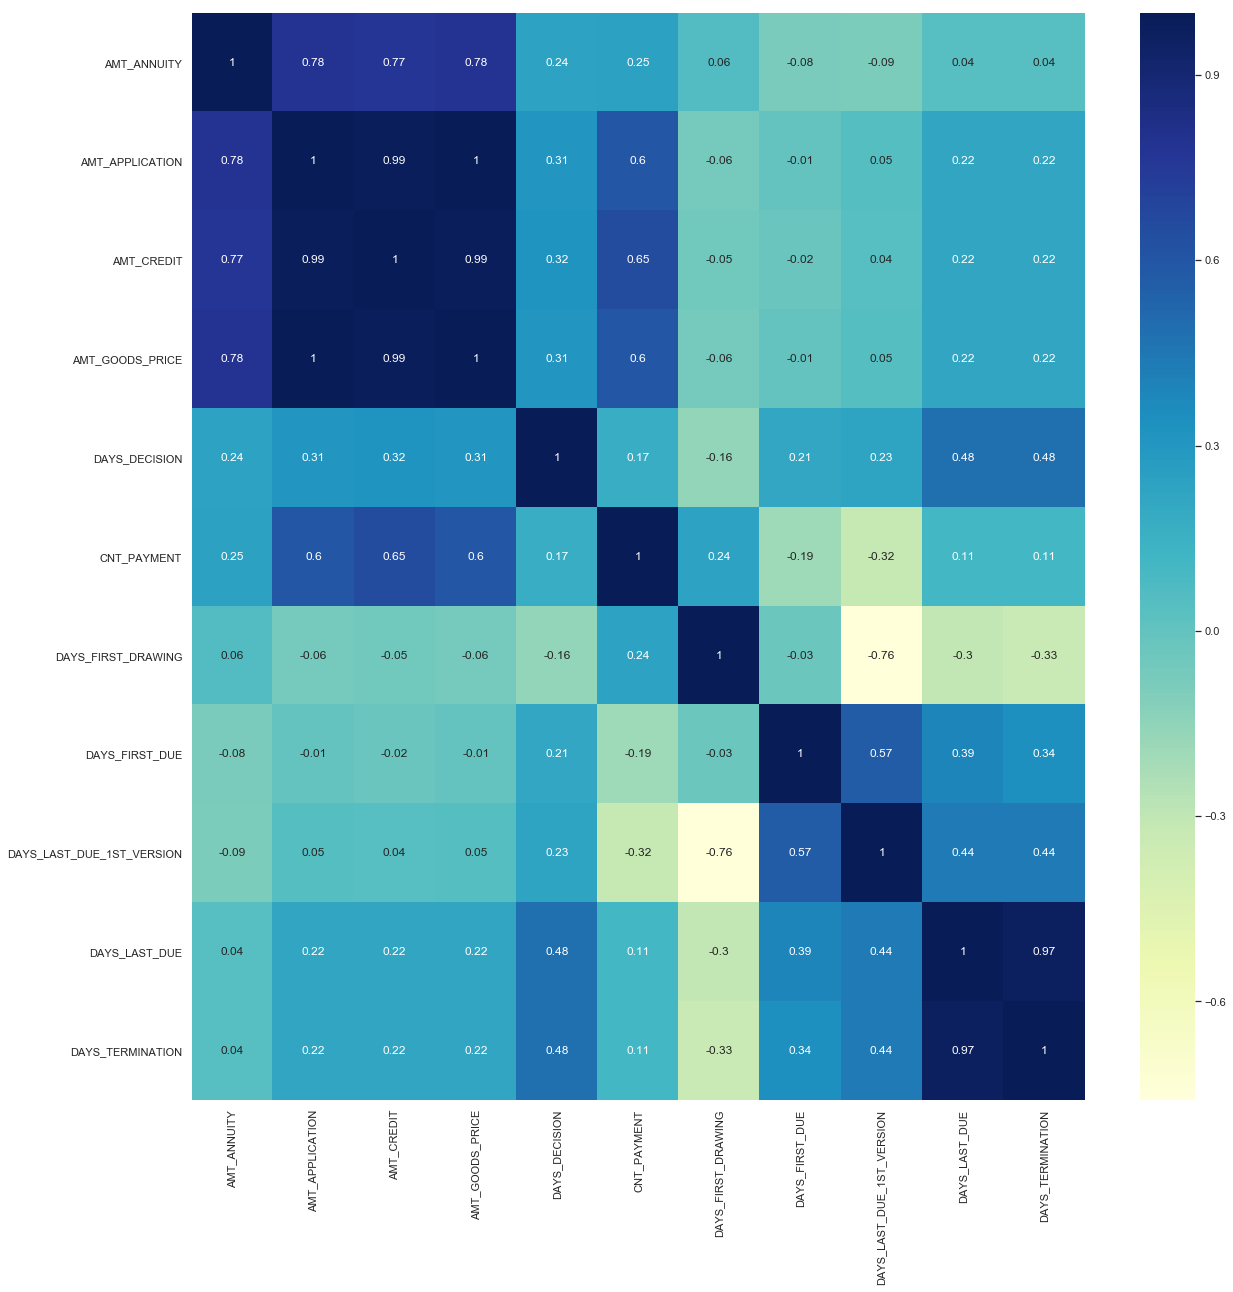

In [50]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.set(font_scale=1.0)
sns.heatmap(round(ndquant_df_corr,2), cmap="YlGnBu", annot=True)
plt.show()

** Correlation Matrix**

- AMT_CREDIT with AMT_GOODS_PRICE 0.99
- AMT_CREDIT with AMT_APPLICATIOn 0.99
- DAYS_LAST_DUE with DAYS_TERMINATION 0.97
- AMT_ANNUITY with AMT_APPLICATION 0.78
- AMT_ANNUITY with AMT_GOODS_PRICE 0.78
- AMT_CREDIT with AMT_ANNUITY 0.77
- CNT_PAYMENT with AMT_CREDIT 0.65
- AMT_APPLICATION with CNT_PAYMENT 0.60
- DAYS_LAST_DUE_1ST_VERSION with DAYS_FIRST_DUE 0.57
- DAYS_DECISION with DAYS_TERMINATION 0.48


In [51]:
#Filtering the categorical columns in to new df
ncat_df=prevdata_df.select_dtypes(include=["category"])

In [59]:
ncat_df.drop(["SELLERPLACE_AREA"],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


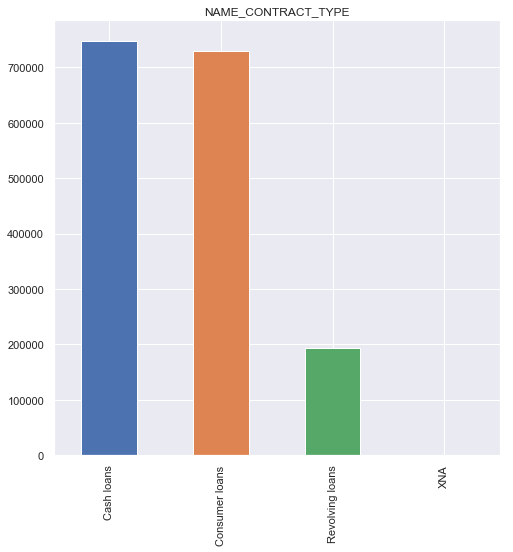

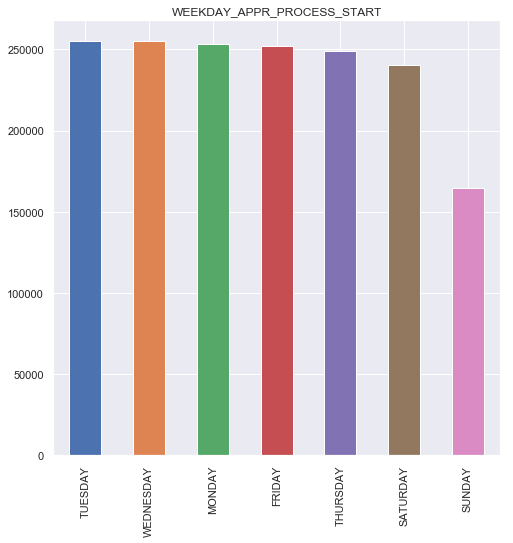

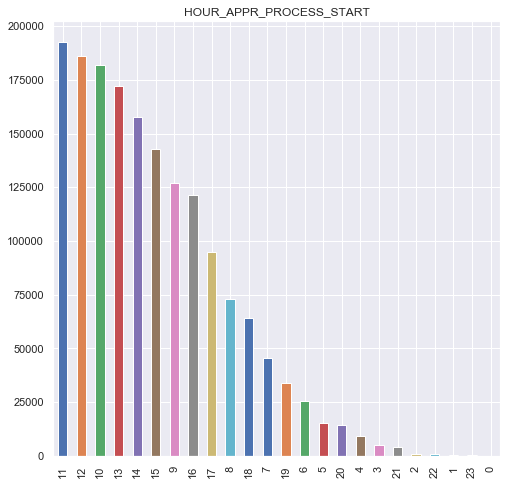

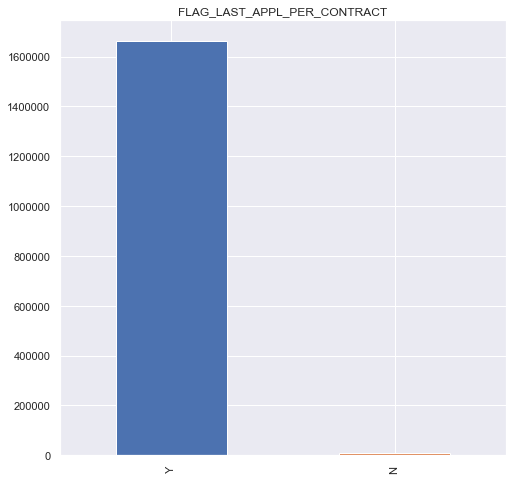

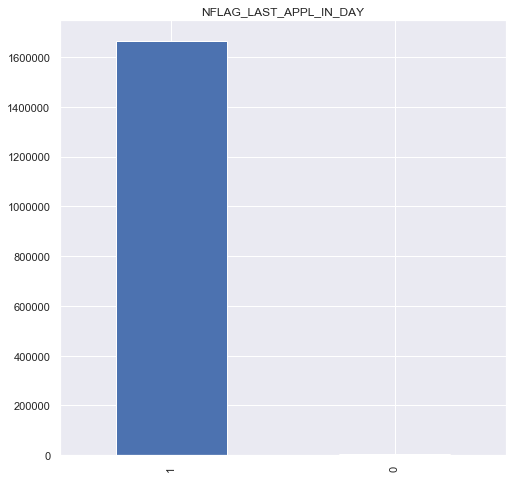

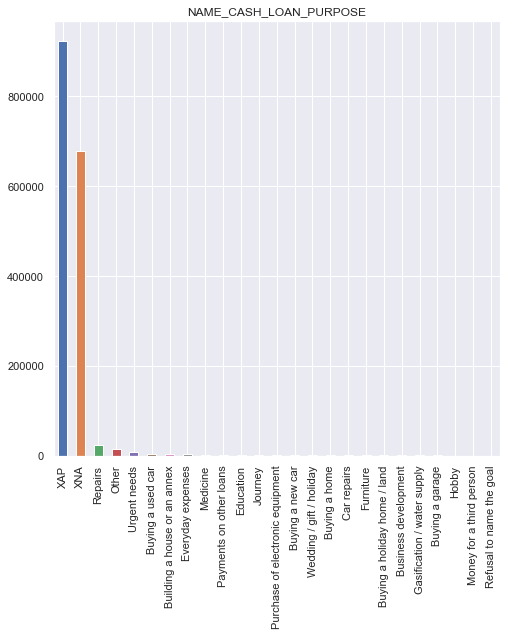

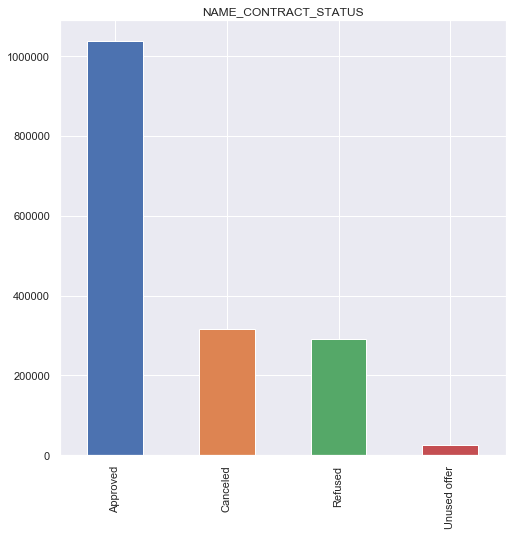

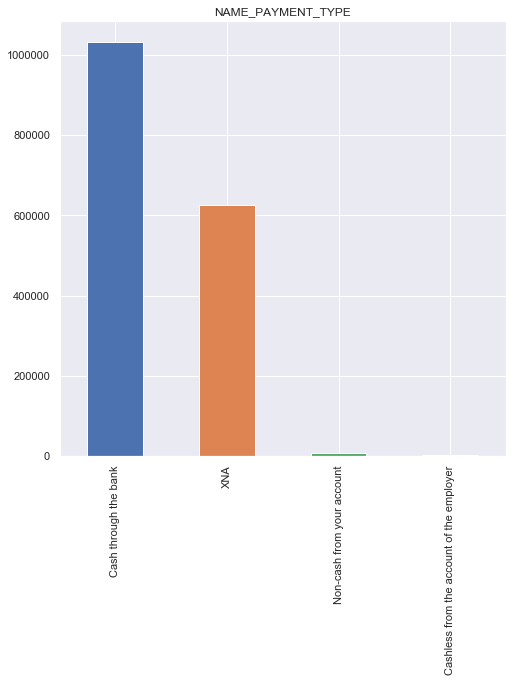

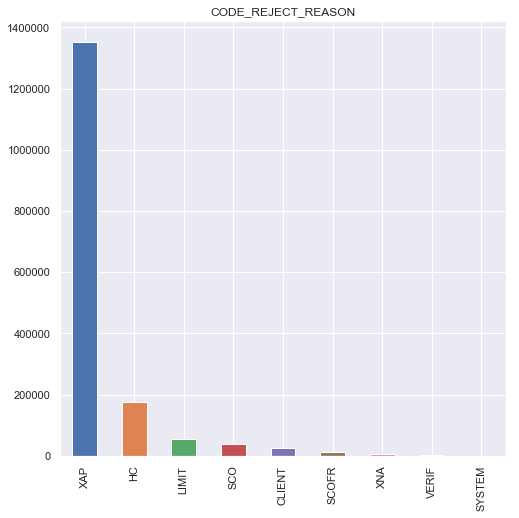

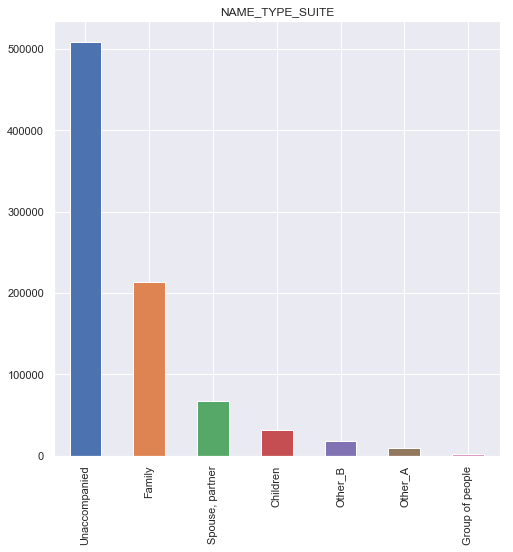

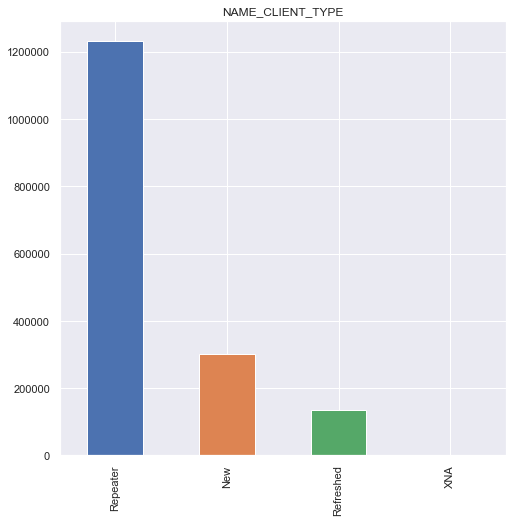

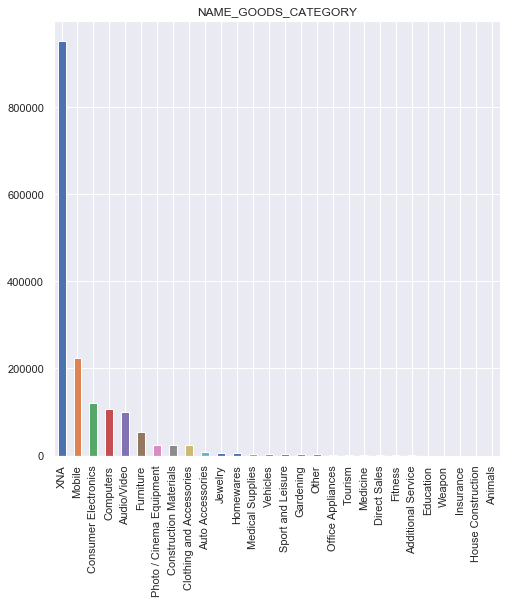

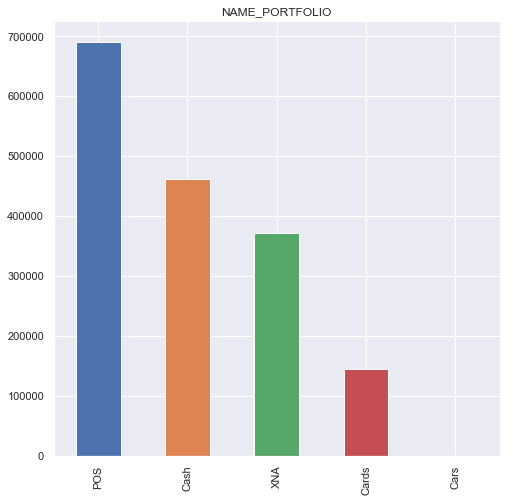

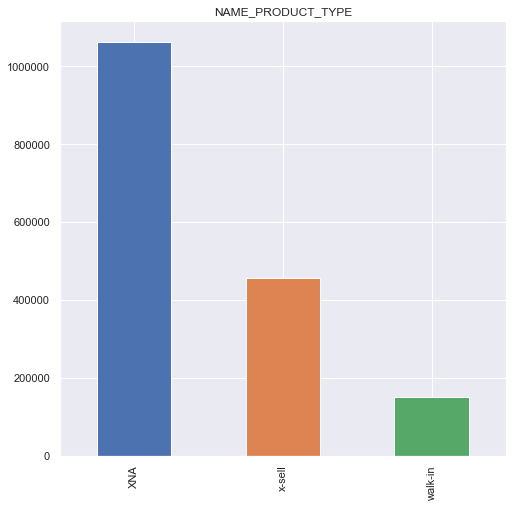

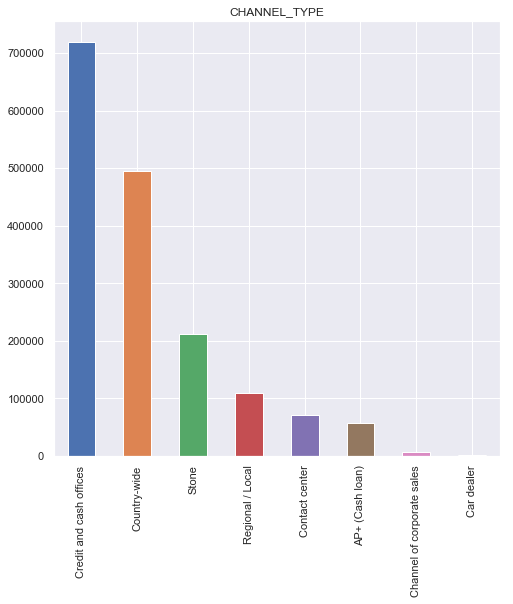

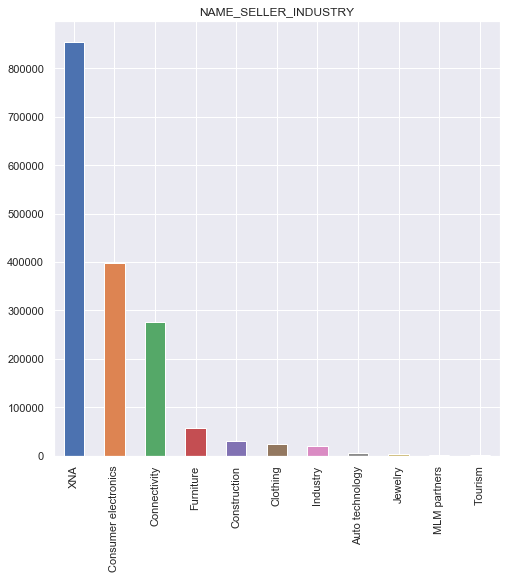

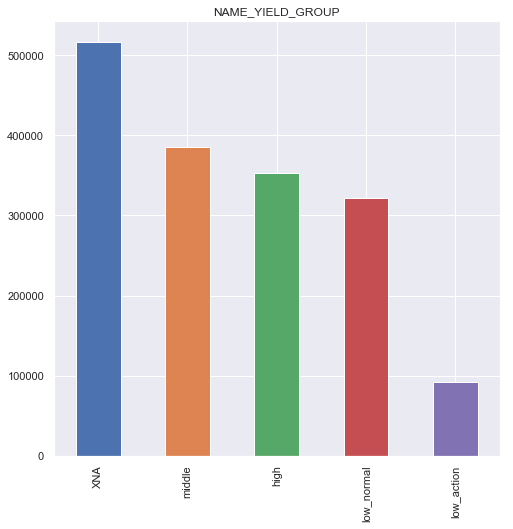

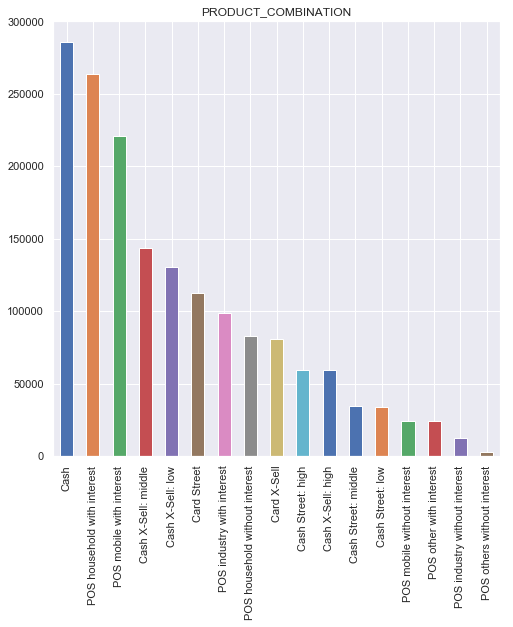

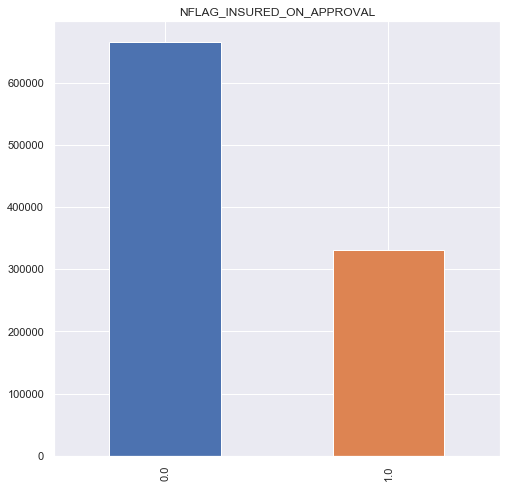

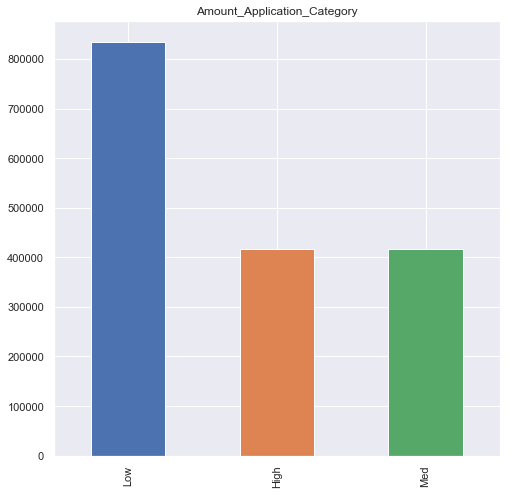

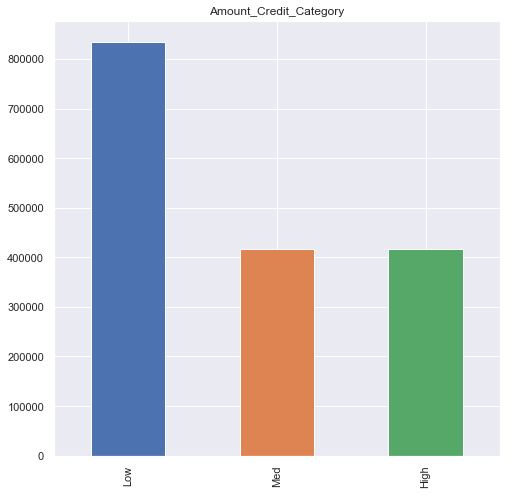

In [60]:
#Plotting univariate analysis for categorical columns
import seaborn as sns
for column in ncat_df.columns:
    plt.figure(figsize=(8,8))
    ncat_df[column].value_counts().plot("bar")
    plt.title(column)
    plt.show()